/var/folders/h6/rvjj9_zx17ncq19_s79xkvw00000gn/T/ipykernel_23973/3666103839.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model_name", y="mse", data=metrics_avg, ax=axes[0], palette="Blues_d")
/var/folders/h6/rvjj9_zx17ncq19_s79xkvw00000gn/T/ipykernel_23973/3666103839.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model_name", y="qlike", data=metrics_avg, ax=axes[1], palette="Greens_d")
/var/folders/h6/rvjj9_zx17ncq19_s79xkvw00000gn/T/ipykernel_23973/3666103839.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model_

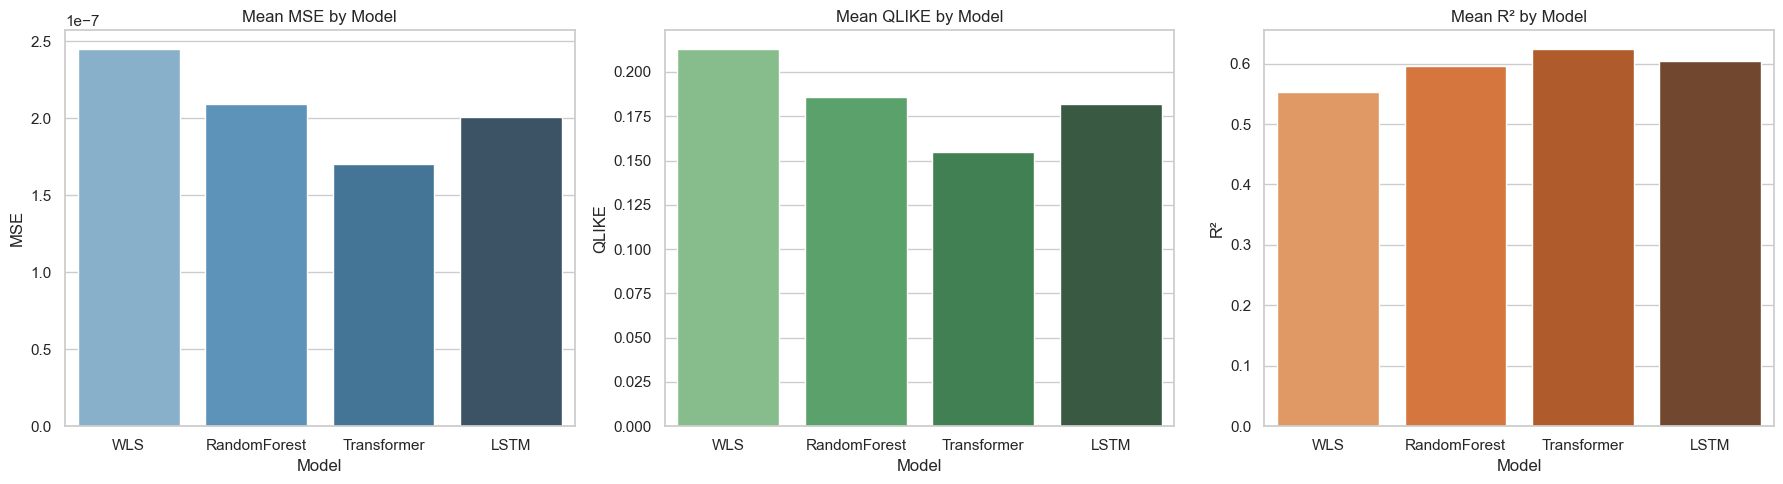

Average Performance Metrics by Model:
     model_name           mse     qlike       r^2
3           WLS  2.449851e-07  0.212867  0.552277
1  RandomForest  2.095314e-07  0.185677  0.596533
2   Transformer  1.706742e-07  0.154789  0.623888
0          LSTM  2.007932e-07  0.182105  0.604092


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("/Users/hanzichun/Desktop/Optiver-07/Dash WebApp/Data/general.csv")

# Group by model and calculate average metrics
metrics_avg = df.groupby("model_name")[["mse", "qlike", "r^2"]].mean().reset_index()

# Reorder for consistent plotting
model_order = ["WLS", "RandomForest", "Transformer", "LSTM"]
metrics_avg["model_name"] = pd.Categorical(metrics_avg["model_name"], categories=model_order, ordered=True)
metrics_avg = metrics_avg.sort_values("model_name")

# Prepare melted dataframe for easier plotting
df_melted = metrics_avg.melt(id_vars="model_name", var_name="Metric", value_name="Value")

# Generate additional plots: separate bar charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MSE
sns.barplot(x="model_name", y="mse", data=metrics_avg, ax=axes[0], palette="Blues_d")
axes[0].set_title("Mean MSE by Model")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("MSE")

# Plot QLIKE
sns.barplot(x="model_name", y="qlike", data=metrics_avg, ax=axes[1], palette="Greens_d")
axes[1].set_title("Mean QLIKE by Model")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("QLIKE")

# Plot R^2
sns.barplot(x="model_name", y="r^2", data=metrics_avg, ax=axes[2], palette="Oranges_d")
axes[2].set_title("Mean R² by Model")
axes[2].set_xlabel("Model")
axes[2].set_ylabel("R²")

plt.tight_layout()
plt.show()


# Display the average metric table
print("Average Performance Metrics by Model:")
print(metrics_avg)
